# Explore Superfund site data

Now that I have wrangled the data into a usable format, I am going to explore further to try and pick out some intersting case studies.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping

import warnings
warnings.simplefilter(action='ignore')

In [2]:
#change default figure size
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
#read superfund site data in
superfund = gpd.read_file('../data/superfund-sites-new.geojson')
superfund.head()

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
0,AK4170024323,ADAK NAVAL AIR STATION SITE,Currently on the Final NPL,51.87750,-176.65250,ADAK,[Blank County],AK,ADAK IS,99546,...,No,Yes,Yes,None,Other,No,None,51.37,www.epa.gov/superfund/adak-nas,POINT (-176.65250 51.87750)
1,AKD004904215,ALASKA BATTERY ENTERPRISES CLEANUP,Deleted from the Final NPL,64.82030,-147.70380,FAIRBANKS,FAIRBANKS NORTH STAR,AK,157 OLD RICHARDSON HIGHWAY,99701,...,No,Yes,Yes,3/2/1993,Recycling,No,None,NaN,www.epa.gov/superfund/alaska-battery,POINT (-147.70380 64.82030)
2,AKD980983241,ALASKA RAILROAD CORP,Not on the NPL,61.22236,-149.88825,ANCHORAGE,ANCHORAGE,AK,1ST AVENUE,99501,...,No,Yes,Insufficient Data,None,Other,No,None,NaN,www.epa.gov/superfund/alaska-railroad-anchorag...,POINT (-149.88825 61.22236)
3,AKD980988158,ARCTIC SURPLUS,Deleted from the Final NPL,64.81220,-147.56430,FAIRBANKS,[Blank County],AK,BADGER RD AND OLD RICHARDSON WAY MI. 6,99701,...,Yes,Yes,Yes,4/18/2005,Waste Management,No,None,NaN,www.epa.gov/superfund/arctic-surplus,POINT (-147.56430 64.81220)
4,AK1570028646,EIELSON AIR FORCE BASE,Currently on the Final NPL,64.67145,-147.04920,FAIRBANKS,FAIRBANKS NORTH STAR,AK,HIGHWAY 2 - 16 MI SE OF FAIRBANKS,99702,...,No,Yes,Insufficient Data,9/30/1998,Waste Management,No,None,48.14,www.epa.gov/superfund/eielson-afb,POINT (-147.04920 64.67145)


In [4]:
# review available attributes
list(superfund.columns)

['SEMS_EPA_ID',
 'SITE_NAME',
 'NPL_STATUS_x',
 'LATITUDE',
 'LONGITUDE',
 'CITY',
 'COUNTY',
 'STATE',
 'STREET_ADDRESS',
 'ZIP_CODE',
 'REGION',
 'NPL_STATUS_y',
 'SUPERFUND_ALTERNATIVE_APPROACH',
 'SITE_WIDE_READY_FOR_ANTICIPATED_USE',
 'HUMAN_EXPOSURE_UNDER_CONTROL',
 'GROUNDWATER_MIGRATION_UNDER_CONTROL',
 'CONSTRUCTION_COMPLETION_DATE',
 'SITE_TYPE',
 'NATIVE_AMERICAN_INTEREST',
 'INDIAN_ENTITY',
 'HRS_SCORE',
 'SUPERFUND_SITE_PROFILE_PAGE_URL',
 'geometry']

Besides exploring the general distribution/location of Superfund sites, I'd also like to explore HRS (hazard ranking system) score and native american interest/indian entity. The other attributes describing the site location and site profile page URL can possibly be used in a popup in the final map. 

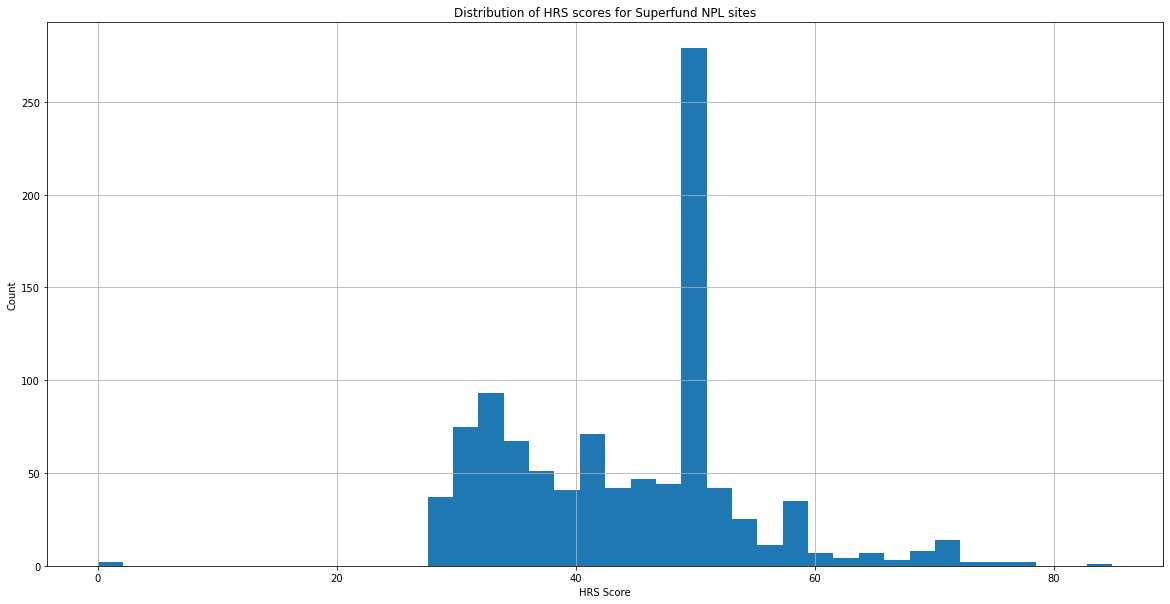

In [5]:
# plot historgram of HRS scores to view distrbution
plot = superfund['HRS_SCORE'].hist(bins=40)
plot.set(xlabel='HRS Score', ylabel='Count', title='Distribution of HRS scores for Superfund NPL sites');

In [6]:
# view HRS score descriptive statistics
superfund['HRS_SCORE'].describe()

count    1012.000000
mean       44.362609
std         9.982082
min         0.000000
25%        35.570000
50%        45.965000
75%        50.000000
max        84.910000
Name: HRS_SCORE, dtype: float64

I already know that to be eligible for the NPL a site must have a HRS score of at least 28.5. The minimum score is 0, this must be sites that had null values for the HRS column. The majority of superfund sites on the NPL have a score of around 50, 75% of sites have a score of of 50 and below. Only 25% of sites on the NPL have a score above 50. There are some sites that really stand out as having a higher HRS score than others, it looks like maybe only one has a score above 80, at the max score of 84.91.

In [7]:
# view top 5 sites with highest HRS score
high_scores = superfund.sort_values(by=['HRS_SCORE'], ascending=False)
high_scores.head()

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
804,MOD981126899,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,Currently on the Final NPL,37.878097,-90.539344,DESLOGE,ST. FRANCOIS,MO,SECTION 25 26 35 & 36 T37N R4E,63601,...,No,No,Not a Groundwater Site,None,Waste Management,No,None,84.91,www.epa.gov/superfund/bigrivermine,POINT (-90.53934 37.87810)
837,MON000705032,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,Currently on the Final NPL,38.166150,-90.814264,RICHWOODS,WASHINGTON,MO,21 ACRES IN NORTHEAST WASHINGTON COUNTY,63071,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyrichwoods,POINT (-90.81426 38.16615)
835,MON000705027,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,Currently on the Final NPL,38.075278,-90.738333,OLD MINES,WASHINGTON,MO,INTERSECTION OF HIGHWAYS 21 AND 47,63630,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyoldmines,POINT (-90.73833 38.07528)
1031,NJD980505416,LIPARI LANDFILL,Currently on the Final NPL,39.720281,-75.141939,PITMAN,GLOUCESTER,NJ,RT 322,08071,...,No,Yes,Yes,9/26/2018,Waste Management,No,None,75.60,www.epa.gov/superfund/lipari,POINT (-75.14194 39.72028)
111,CAD009106527,MCCORMICK & BAXTER CREOSOTING,Currently on the Final NPL,37.947851,-121.306635,STOCKTON,SAN JOAQUIN,CA,1214 W WASHINGTON ST,95203,...,No,Yes,Yes,None,Manufacturing/Processing/Maintenance,No,None,74.86,www.epa.gov/superfund/mccormick-baxter,POINT (-121.30663 37.94785)


## Missouri's Old Lead Belt

The top three sites with the highest HRS score are located in Missouri, two of which are in the same county. I can see that the two in the same county are both part of Washington County Lead District. After inspecting these sites further in QGIS, I found this area is known as Missouri's Old Lead Belt and that it contains seven Superfund sites. I also discovered that the true area encompassed by a Superfund site is often much larger than a single point location. The seven superfund sites in Missouri's Old Lead Belt cover four entire counties: Washington, Jefferson, St. Francois, and Madison. I already know that three of these sites have the highest hazard ranking scores out of any in the US. I want to see where the other four rank.

In [8]:
# filter columns for easier viewing of HRS score rankings
# view top 20 scores
high_scores.filter(['SITE_NAME', 'COUNTY', 'STATE', 'HRS_SCORE']).head(20)

,SITE_NAME,COUNTY,STATE,HRS_SCORE
804,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,ST. FRANCOIS,MO,84.91
837,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,WASHINGTON,MO,76.81
835,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,WASHINGTON,MO,76.81
1031,LIPARI LANDFILL,GLOUCESTER,NJ,75.60
111,MCCORMICK & BAXTER CREOSOTING,SAN JOAQUIN,CA,74.86
1009,HELEN KRAMER LANDFILL,GLOUCESTER,NJ,72.66
598,INDUSTRIPLEX NPL SITE,MIDDLESEX,MA,72.42
1336,PACIFIC WOOD PRESERVING OF OREGON,YAMHILL,OR,71.78
151,STOKER CHEMICAL COMPANY (1),IMPERIAL,CA,70.94
355,JOINT BASE PEARL HARBOR-HICKAM HAWAII,HONOLULU,HI,70.82


Another of Missouri's Old Lead Belt sites is in the top 20 sites, Southwest Jefferson County Mining. It has a score of 70.71 which is shared by ten of the top twenty sites. Now I want to filter just the sites in Missouri's Old Lead Belt to see what their scores are.

In [9]:
# select sites in Missouri's Old Lead Belt and sort descending by HRS score
# MINKER/STOUT/ROMAINE CREEK is not part of Missouri's Old Lead Belt
MO = superfund.loc[(superfund['STATE'] == 'MO')]
MO = MO.loc[(MO['COUNTY'] == 'ST. FRANCOIS') | (MO['COUNTY'] == 'WASHINGTON') | (MO['COUNTY'] == 'MADISON') | (MO['COUNTY'] == 'JEFFERSON')]
MO

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
802,MOD098633415,ANSCHUTZ - MADISON MINE,Currently on the Final NPL,37.546111,-90.276111,FREDERICKTOWN,MADISON,MO,401 N MINE LAMOTTE ST,63645,...,No,No,Insufficient Data,None,Mining,No,None,58.41,www.epa.gov/superfund/madisoncountymines,POINT (-90.27611 37.54611)
804,MOD981126899,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,Currently on the Final NPL,37.878097,-90.539344,DESLOGE,ST. FRANCOIS,MO,SECTION 25 26 35 & 36 T37N R4E,63601,...,No,No,Not a Groundwater Site,None,Waste Management,No,None,84.91,www.epa.gov/superfund/bigrivermine,POINT (-90.53934 37.87810)
813,MOD980741912,MINKER/STOUT/ROMAINE CREEK,Currently on the Final NPL,38.440000,-90.480000,IMPERIAL,JEFFERSON,MO,4037 W ROCK CREEK RD & SWALLER,63052,...,Yes,Yes,Not a Groundwater Site,9/30/1997,Other,No,None,36.78,www.epa.gov/superfund/minkerstoutromainecreek,POINT (-90.48000 38.44000)
826,MON000705443,SOUTHWEST JEFFERSON COUNTY MINING,Currently on the Final NPL,38.186794,-90.758975,JEFFERSON COUNTY,JEFFERSON,MO,"SLVR LK TRL & THNDR RDG RD,.5M W HWY WW",63023,...,No,No,No,None,Mining,No,None,70.71,www.epa.gov/superfund/southwestjeffersoncounty...,POINT (-90.75898 38.18679)
834,MON000705842,WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK,Currently on the Final NPL,37.840531,-90.799556,CALEDONIA,WASHINGTON,MO,2 MI. N OF INT. OF BIG RIVER & HWY 21,63631,...,No,No,Insufficient Data,None,"Manufacturing/Processing/Maintenance, Mining, ...",No,None,50.00,www.epa.gov/superfund/washingtoncountyfurnacec...,POINT (-90.79956 37.84053)
835,MON000705027,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,Currently on the Final NPL,38.075278,-90.738333,OLD MINES,WASHINGTON,MO,INTERSECTION OF HIGHWAYS 21 AND 47,63630,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyoldmines,POINT (-90.73833 38.07528)
836,MON000705023,WASHINGTON COUNTY LEAD DISTRICT - POTOSI,Currently on the Final NPL,37.939900,-90.772400,POTOSI,WASHINGTON,MO,500 FT EAST OF BELL ST AND VALLEY ROAD,63664,...,No,No,Insufficient Data,None,Mining,No,None,50.00,www.epa.gov/superfund/washingtoncountypotosi,POINT (-90.77240 37.93990)
837,MON000705032,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,Currently on the Final NPL,38.166150,-90.814264,RICHWOODS,WASHINGTON,MO,21 ACRES IN NORTHEAST WASHINGTON COUNTY,63071,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyrichwoods,POINT (-90.81426 38.16615)


So all seven of the Superfund sites in Missouri's Old Lead Belt have an HRS score of 50 and above, putting all seven in the 75th percentile.

I would like to explore this case study in the final map. The map could first show all counties affected, and then guide the user through each site/county with specifics. _Look at census data/CDC SVI tracts/TRI facilities in this area?_

1. BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.
2. WASHINGTON COUNTY LEAD DISTRICT - OLD MINES
3. WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS
4. SOUTHWEST JEFFERSON COUNTY MINING: this site encompasses the entire county because mining waste has been transported by the Big River and manually relocated to other areas throughout the county.
5. ANSCHUTZ - MADISON MINE
6. WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK
7. WASHINGTON COUNTY LEAD DISTRICT - POTOSI

## Superfund sites on tribal land

The exploration below attempts to learn if Native Americans are disproportionately exposed to higher risk Superfund sites.

US Government Accountability Office found that the EPA should improve the reliability of data on NPL sites affecting Indian Tribes ([source](https://www.gao.gov/assets/700/696566.pdf)).

NATIVE_AMERICAN_INTEREST indicates sites where tribal members or tribal land would be directly affected by the release of hazardous substances.

In [10]:
# filter superfund sites to see which ones are of interest to native americans
tribe = superfund.loc[(superfund['NATIVE_AMERICAN_INTEREST'] == 'Yes')]
tribe

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
6,AK0001897602,SALT CHUCK MINE,Currently on the Final NPL,55.626442,-132.558853,THORNE BAY,[Blank County],AK,"4 MI SW CY, T72S R84E S17, COPPER RIVER",99919,...,No,Yes,Yes,None,Mining,Yes,Organized Village of Kasaan,50.00,www.epa.gov/superfund/salt-chuck-mine,POINT (-132.55885 55.62644)
46,AZD094524097,CYPRUS TOHONO COPPER MINE,Not on the NPL,32.528611,-111.916111,CASA GRANDE,PINAL,AZ,INDIAN ROAD NUMBER 15,,...,No,Yes,Insufficient Data,None,Mining,Yes,Tohono O'odham Nation of Arizona,NaN,www.epa.gov/superfund/cyprustohono,POINT (-111.91611 32.52861)
53,AZD980737530,TUCSON INTERNATIONAL AIRPORT AREA,Currently on the Final NPL,32.105561,-110.933300,TUCSON,PIMA,AZ,NOGALES HWY,85734,...,No,Yes,No,None,Manufacturing/Processing/Maintenance,Yes,Tohono O'odham Nation of Arizona,57.80,www.epa.gov/superfund/tucsonairport,POINT (-110.93330 32.10556)
70,CAD980638860,CELTOR CHEMICAL WORKS,Deleted from the Final NPL,41.102700,-123.691100,HOOPA,HUMBOLDT,CA,BETW NORTON FLD & TRINITY RIV,95546,...,Yes,Yes,Not a Groundwater Site,9/29/1989,Recycling,Yes,"Hoopa Valley Tribe, California",NaN,www.epa.gov/superfund/celtorchemical,POINT (-123.69110 41.10270)
74,CAD980638225,COPPER BLUFF MINE,Currently on the Final NPL,41.109972,-123.686000,HOOPA,HUMBOLDT,CA,"OFF HIGHWAY 96, APPROXIMATELY 0.9 MILE",95546,...,No,No,Not yet designated,None,"Mining, Other",Yes,"Hoopa Valley Tribe, California",50.00,www.epa.gov/superfund/copper-bluff-mine,POINT (-123.68600 41.10997)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,ORD095003687,GOULD,Deleted from the Final NPL,45.569200,-122.748300,PORTLAND,MULTNOMAH,OR,5909 NW 61ST AV,97208,...,Yes,Yes,Yes,9/28/2000,Recycling,Yes,Confederated Tribes and Bands of the Yakama Na...,NaN,www.epa.gov/superfund/gould,POINT (-122.74830 45.56920)
1332,ORD009020603,MCCORMICK AND BAXTER CREOSOTING SUPERFUND SITE,Currently on the Final NPL,45.579443,-122.739440,PORTLAND,MULTNOMAH,OR,6900 N EDGEWATER ROAD,97203,...,No,Yes,Yes,9/27/2005,Manufacturing/Processing/Maintenance,Yes,Confederated Tribes and Bands of the Yakama Na...,50.00,www.epa.gov/superfund/mccormick-baxter-portland,POINT (-122.73944 45.57944)
1333,ORN001002476,NORTH RIDGE ESTATES,Currently on the Final NPL,42.264800,-121.746500,KLAMATH FALLS,KLAMATH,OR,OLD FORT ROAD AND NORTH RIDGE DRIVE,97601,...,No,No,Not a Groundwater Site,None,Waste Management,Yes,Klamath Tribes,0.00,www.epa.gov/superfund/north-ridge-estates,POINT (-121.74650 42.26480)
1336,ORD009042532,PACIFIC WOOD PRESERVING OF OREGON,Currently on the Final NPL,45.097222,-123.426944,SHERIDAN,YAMHILL,OR,22125 SOUTHWEST ROCK CREEK ROAD,97378,...,Yes,Yes,Yes,9/24/2008,Manufacturing/Processing/Maintenance,Yes,Confederated Tribes of the Grand Ronde Communi...,71.78,www.epa.gov/superfund/taylor-lumber,POINT (-123.42694 45.09722)


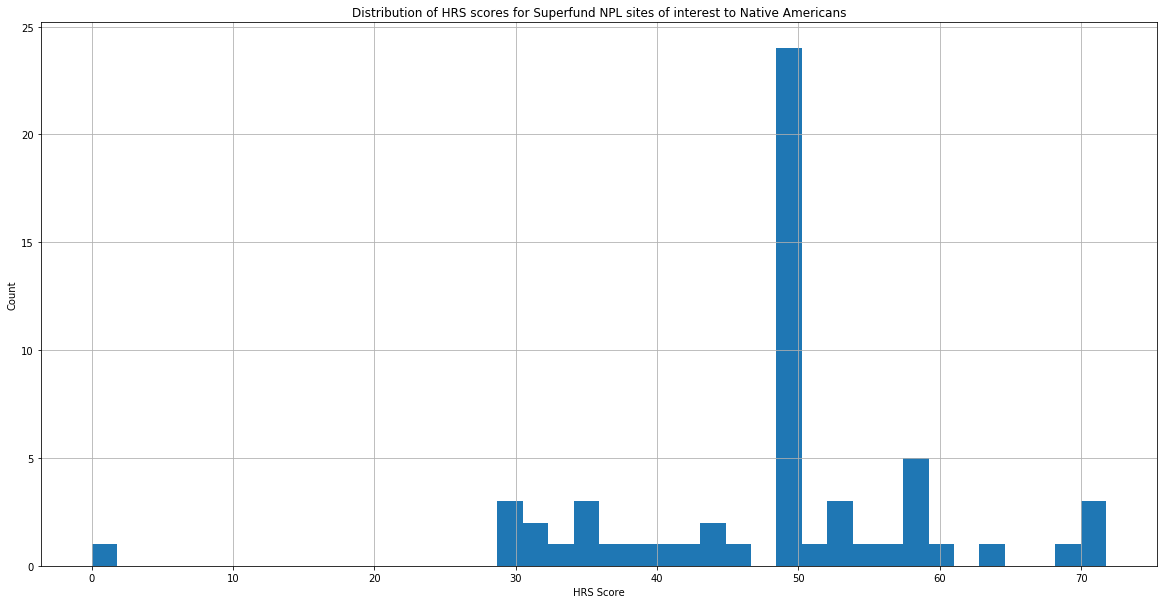

In [11]:
# plot historgram of HRS scores on tribal lands to view distrbution
plot = tribe['HRS_SCORE'].hist(bins=40)
plot.set(xlabel='HRS Score', ylabel='Count', title='Distribution of HRS scores for Superfund NPL sites of interest to Native Americans');

In [12]:
# view descriptive statistics for HRS scores on tribal lands
tribe['HRS_SCORE'].describe()

count    58.000000
mean     48.291724
std      11.906130
min       0.000000
25%      43.940000
50%      50.000000
75%      52.507500
max      71.780000
Name: HRS_SCORE, dtype: float64

According to the filtered subset above, there are 75 Superfund sites that are of interest to Native Americans. So out of the 1470 Superfund sites on the NPL in the US, only 5.1%  are of interest to Native Americans. 

But out of all the sites in the US, any HRS score above 50 puts the site in the 75th percentile. Out of the 5.1% of sites of interest to Native Americans, 50% of these have a score above 50, putting them in the 75th percentile for HRS scores.

Now I will try to find a specific case study or two here to explore.

In [16]:
# view tribal sites by descending HRS score
tribe.sort_values(by=['HRS_SCORE'], ascending=False)

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
1336,ORD009042532,PACIFIC WOOD PRESERVING OF OREGON,Currently on the Final NPL,45.097222,-123.426944,SHERIDAN,YAMHILL,OR,22125 SOUTHWEST ROCK CREEK ROAD,97378,...,Yes,Yes,Yes,9/24/2008,Manufacturing/Processing/Maintenance,Yes,Confederated Tribes of the Grand Ronde Communi...,71.78,www.epa.gov/superfund/taylor-lumber,POINT (-123.42694 45.09722)
877,NCSFN0406989,BARBER ORCHARD,Currently on the Final NPL,35.445833,-83.063889,WAYNESVILLE,HAYWOOD,NC,U.S. HIGHWAY 23/74,28786,...,Yes,Yes,Yes,9/29/2011,Other,Yes,Eastern Band of Cherokee Indians,70.71,www.epa.gov/superfund/barber-orchard,POINT (-83.06389 35.44583)
592,MAD002084093,GE PITTSFIELD HOUSATONIC RIVER SUPERFUND SITE,Proposed for NPL,42.450278,-73.232222,PITTSFIELD,BERKSHIRE,MA,"BETWEEN PITTSFIELD AND LENOX, MA",01201,...,No,No,No,None,Manufacturing/Processing/Maintenance,Yes,Mashantucket Pequot Indian Tribe; Mashpee Wamp...,70.71,www.epa.gov/superfund/ge,POINT (-73.23222 42.45028)
856,MTD057561763,ANACONDA ALUMINUM CO COLUMBIA FALLS REDUCTION ...,Currently on the Final NPL,48.391660,-114.136514,COLUMBIA FALLS,FLATHEAD,MT,EASTERN END OF ALUMINUM DRIVE,59912,...,No,Insufficient Data,Insufficient Data,None,Manufacturing/Processing/Maintenance,Yes,Confederated Salish and Kootenai Tribes of the...,68.39,www.epa.gov/superfund/columbia-falls,POINT (-114.13651 48.39166)
871,MTD980502777,SILVER BOW CREEK/BUTTE AREA,Currently on the Final NPL,46.002307,-112.616980,BUTTE,[Blank County],MT,BUTTE TO MILLTOWN RESERVIOR,59750,...,No,Insufficient Data,Yes,None,Waste Management,Yes,Confederated Salish and Kootenai Tribes of the...,63.76,www.epa.gov/superfund/silver-bow-butte,POINT (-112.61698 46.00231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,NYD000831644,HOOKER (HYDE PARK),Deleted from the Final NPL,43.131111,-79.036669,NIAGARA FALLS,NIAGARA,NY,HYDE PARK BLVD,14304,...,Yes,Yes,Yes,7/18/2003,Waste Management,Yes,Seneca Nation of Indians,NaN,www.epa.gov/superfund/hooker-hyde-park,POINT (-79.03667 43.13111)
1219,NYD980530265,PETER COOPER,Deleted from the Final NPL,42.458778,-78.927583,GOWANDA,CATTARAUGUS,NY,PALMER STREET,14070,...,Yes,Yes,Yes,9/17/2010,Manufacturing/Processing/Maintenance,Yes,Seneca Nation of Indians,NaN,www.epa.gov/superfund/peter-cooper,POINT (-78.92758 42.45878)
1241,NY0213820830,U S SENECA ARMY DEPOT,Currently on the Final NPL,42.750000,-76.854450,ROMULUS,SENECA,NY,FAYETTE RD,14541,...,No,Yes,Yes,None,Waste Management,Yes,Cayuga Nation,NaN,www.epa.gov/superfund/seneca-army-depot,POINT (-76.85445 42.75000)
1327,ORD071803985,ECOLUBE RECOVERY,Deleted from the Final NPL,45.606389,-122.691389,PORTLAND,MULTNOMAH,OR,AKA CHEMPRO OF OREGON INC,97217,...,Yes,Yes,Yes,8/5/2013,"Manufacturing/Processing/Maintenance, Recycling",Yes,Confederated Tribes and Bands of the Yakama Na...,NaN,www.epa.gov/superfund/harbor-oil,POINT (-122.69139 45.60639)


A quick search on the third site on this list, the GE Pittsfield Housatonic River Superfund Site, turns up a lot of information. From 1932 through 1977 at this site, General Electric manufactured and serviced electrical transformers containing PCBs. Years of PCB and industrial chemical use, and improper disposal, led to extensive contamination around Pittsfield, MA as well as down the entire length of the Housatonic River through Connecticut to the Long Island Sound. This could be another interesting case study to show how much toxins can spread and how vast the clean-up efforts can be.